# Reduced Model with autoReduce attempt 9 
## include error metric
7.9.2020 <br>
In this model we will try to make a plot of error metrics for each model so we can choose a reduced model.
 <br>
 **Make sure using correct initial conditions** (not just ones)

In [7]:
# imports
from libsbml import *
import sys
import numpy as np
from auto_reduce import *
from auto_reduce.utils import get_ODE
import matplotlib.pyplot as plt
from auto_reduce.utils import reduce

import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

import tqdm
import math

Loading BokehJS ...

In [8]:
%run prep_for_autoreduce.py

### Timescale separation

In [9]:
# Define list of indices to remove
#i_list = [5,6,9,10,13, 14,17,18,23,24,28,29,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,66,67]
i_list = [5]

# Get appropriate list of complexes with indices in i_list
timescale_list = []
for i in i_list:
    #/print(i)
    timescale_list.append(x[i])

print(timescale_list)

# Get appropriate list of complexes that are not in timescale_list
# What you should pass into solve_timescale_separation
update_timescale = []
for item in x:
    if item not in timescale_list:
        update_timescale.append(item)

print(update_timescale)
        




[x5]
[x0, x1, x2, x3, x4, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21, x22, x23, x24, x25, x26, x27, x28, x29, x30, x31, x32, x33, x34, x35, x36, x37, x38, x39, x40, x41, x42, x43, x44, x45, x46, x47, x48, x49, x50, x51, x52, x53, x54, x55, x56, x57, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67]


In [10]:
timepoints_ssm = np.linspace(0,100,10)
timepoints_ode = np.linspace(0, 100, 10)
sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)

In [11]:
aa,bb = sys_reduce.solve_timescale_separation(update_timescale)

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
Successful time-scale separation solution obtained.


In [12]:
sys_reduce.get_error_metric(aa)

2.828427122486127

## Make a list of reduced models
Esssentialy make a bunch of `i_list`'s that you want to pass in

In [8]:
remove_list = [ [5],
               [5,6],
               [5,6,9,10], 
               [5,6,9,10,23,24,28,29,31,32,35,39,40,43,44], # random slices of complexes
            [5,9,13,17,23,28,31,35,39,43,47,51,55,59,63,66], # remove every other one from whole complex list
             [5,6,9,10,13, 14,17,18,23,24,28,29,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,66,67], # entire complex list,
              # [0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,
              # 34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,64]
    
]

In [9]:
len(remove_list)

6

In [22]:
def error_plot(remove_list, title = None):
    
    #colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
     '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
    p = bokeh.plotting.figure(width = 550, height = 450, title = title,
            x_axis_label = 'Model Number', y_axis_label = 'Error Metric Value')
    
    for ind,sub_remove in tqdm.tqdm(enumerate(remove_list)):
        
        timescale_list = []
        for s in sub_remove:
            timescale_list.append(x[s])

        # Get appropriate list of complexes that are not in timescale_list
        # What you should pass into solve_timescale_separation
        update_timescale = []
        for item in x:
            if item not in timescale_list:
                update_timescale.append(item)

        timepoints_ssm = np.linspace(0,100,10)
        timepoints_ode = np.linspace(0, 100, 10)
        sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)

        aa,bb = sys_reduce.solve_timescale_separation(update_timescale)

        curr_error = sys_reduce.get_error_metric(aa)
        
        if math.isnan(curr_error):
            curr_error = 0
        
            p.circle(ind,curr_error,color = 'black', size = 10, legend_label = 'nan Model {i}'.format(i = ind))
        
        elif math.isinf(curr_error):
            curr_error = 0
            
            p.circle(ind,curr_error,color = 'black', size = 10, legend_label = 'inf Model {i}'.format(i = ind))
            
        else:
            p.circle(ind,curr_error,color = colors[ind], size = 10, legend_label = 'Model {i}'.format(i = ind))

    p.legend.location = 'top_right'
    
    bokeh.io.show(p)
    
    for i,group in enumerate(remove_list):
        print('Model', i, ':', group)
    return None
        
        
        

In [19]:
error_plot(remove_list, title = 'Error Metric for Different Reduced Models')

0it [00:00, ?it/s]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
Successful time-scale separation solution obtained.


1it [00:01,  1.95s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
Successful time-scale separation solution obtained.


2it [00:04,  2.14s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
Successful time-scale separation solution obtained.


3it [00:07,  2.25s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 36, 37, 38, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
Successful time-scale separation solution obtained.


4it [00:10,  2.72s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


5it [00:13,  2.71s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


6it [00:18,  3.11s/it]


Model 0 : [5]
Model 1 : [5, 6]
Model 2 : [5, 6, 9, 10]
Model 3 : [5, 6, 9, 10, 23, 24, 28, 29, 31, 32, 35, 39, 40, 43, 44]
Model 4 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 5 : [5, 6, 9, 10, 13, 14, 17, 18, 23, 24, 28, 29, 31, 32, 35, 36, 39, 40, 43, 44, 47, 48, 51, 52, 55, 56, 59, 60, 63, 64, 66, 67]


Why am I getting different error metrics for the same model? Let's try to troubleshoot and figure out what the problem is.

Let's look at model 5: 

In [12]:
# Define list of indices to remove
test_list = []
for j in range(5):
    i_list = [5,6,9,10,13, 14,17,18,23,24,28,29,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,66,67]

    # Get appropriate list of complexes with indices in i_list
    timescale_list = []
    for i in i_list:
        #/print(i)
        timescale_list.append(x[i])


    # Get appropriate list of complexes that are not in timescale_list
    # What you should pass into solve_timescale_separation
    update_timescale = []
    for item in x:
        if item not in timescale_list:
            update_timescale.append(item)





    timepoints_ssm = np.linspace(0,100,10)
    timepoints_ode = np.linspace(0, 100, 10)
    sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)

    aa,bb = sys_reduce.solve_timescale_separation(update_timescale)

    curr_test= sys_reduce.test_error_metric(aa)
    test_list.append(curr_test)

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.
attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.
attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.
attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.
attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58,

In [13]:
# check to see if they are all equal
for i in range(len(test_list)):
    for j in range(len(test_list)):
        continue
        #print(test_list[i] == test_list[j])
         

**Try to plot different error metrics of model 5?** See if any of them match closer to original.

In [23]:
i_list = [5,6,9,10,13, 14,17,18,23,24,28,29,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,66,67]

model_5 = [i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list]

In [24]:
error_plot(model_5, title = 'Error Metric for No Complexes')

0it [00:00, ?it/s]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


1it [00:05,  5.80s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


2it [00:18,  7.88s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


3it [00:34, 10.41s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


/Users/ankitaroychoudhury/autoReduce/auto_reduce/model_reduction.py:147: RuntimeWarning: invalid value encountered in matmul
  y = self.C@x_sol
4it [00:51, 12.39s/it]

The error is NaN, something wrong...continuing.
attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


5it [01:00, 11.25s/it]

The error is NaN, something wrong...continuing.
attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


6it [01:06,  9.71s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


7it [01:12,  8.44s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


8it [01:17,  7.63s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


9it [01:26,  7.96s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


10it [01:32,  7.24s/it]

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


11it [01:37,  8.84s/it]


Model 0 : [5, 6, 9, 10, 13, 14, 17, 18, 23, 24, 28, 29, 31, 32, 35, 36, 39, 40, 43, 44, 47, 48, 51, 52, 55, 56, 59, 60, 63, 64, 66, 67]
Model 1 : [5, 6, 9, 10, 13, 14, 17, 18, 23, 24, 28, 29, 31, 32, 35, 36, 39, 40, 43, 44, 47, 48, 51, 52, 55, 56, 59, 60, 63, 64, 66, 67]
Model 2 : [5, 6, 9, 10, 13, 14, 17, 18, 23, 24, 28, 29, 31, 32, 35, 36, 39, 40, 43, 44, 47, 48, 51, 52, 55, 56, 59, 60, 63, 64, 66, 67]
Model 3 : [5, 6, 9, 10, 13, 14, 17, 18, 23, 24, 28, 29, 31, 32, 35, 36, 39, 40, 43, 44, 47, 48, 51, 52, 55, 56, 59, 60, 63, 64, 66, 67]
Model 4 : [5, 6, 9, 10, 13, 14, 17, 18, 23, 24, 28, 29, 31, 32, 35, 36, 39, 40, 43, 44, 47, 48, 51, 52, 55, 56, 59, 60, 63, 64, 66, 67]
Model 5 : [5, 6, 9, 10, 13, 14, 17, 18, 23, 24, 28, 29, 31, 32, 35, 36, 39, 40, 43, 44, 47, 48, 51, 52, 55, 56, 59, 60, 63, 64, 66, 67]
Model 6 : [5, 6, 9, 10, 13, 14, 17, 18, 23, 24, 28, 29, 31, 32, 35, 36, 39, 40, 43, 44, 47, 48, 51, 52, 55, 56, 59, 60, 63, 64, 66, 67]
Model 7 : [5, 6, 9, 10, 13, 14, 17, 18, 23, 24, 

Okay error metric not great for this one. **Try the model 4,** that skips over each one

In [25]:
i_list = [5,9,13,17,23,28,31,35,39,43,47,51,55,59,63,66]
model_4 = [i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list]

error_plot(model_4, title = 'Error Metric for 1/2 Complex')

0it [00:00, ?it/s]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


1it [00:03,  3.04s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


2it [00:06,  3.02s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


3it [00:08,  2.98s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


4it [00:11,  2.88s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


5it [00:14,  2.77s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


6it [00:16,  2.74s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


7it [00:19,  2.66s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


8it [00:21,  2.68s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


9it [00:24,  2.70s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


10it [00:27,  2.70s/it]

attempting to retain : [0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 67]
Successful time-scale separation solution obtained.


11it [00:30,  2.75s/it]


Model 0 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 1 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 2 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 3 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 4 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 5 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 6 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 7 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 8 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 9 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]
Model 10 : [5, 9, 13, 17, 23, 28, 31, 35, 39, 43, 47, 51, 55, 59, 63, 66]


In [17]:
def error_multiple(i_list):
    i_list = [5,9,13,17,23,28,31,35,39,43,47,51,55,59,63,66]
    models = [i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list, i_list]

    error_plot(models)

**Try to plot different outputs of model 5?** See if any of them match closer to original.

In [ ]:
 colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
     '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

    
    
timescale_list = []
for s in sub_remove:
    timescale_list.append(x[s])

# Get appropriate list of complexes that are not in timescale_list
# What you should pass into solve_timescale_separation
update_timescale = []
for item in x:
    if item not in timescale_list:
        update_timescale.append(item)

timepoints_ssm = np.linspace(0,100,10)
timepoints_ode = np.linspace(0, 100, 10)
sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)

aa,bb = sys_reduce.solve_timescale_separation(update_timescale)

p.legend.location = 'top_right'
    
bokeh.io.show(p)

In [28]:
%run prep_for_autoreduce.py

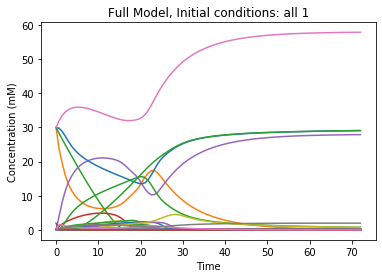

In [29]:
plt.plot(timepoints_ode, sol)
plt.xlabel('Time')
plt.ylabel('Concentration (mM)')
plt.title('Full Model, Normal Initial Conditions')
plt.show()

Ok, we've confirmed this has the correct initial conditions. <br>
**Let's now try with model 5 (plot 5 times)**

Perform timescale separation

In [30]:
# Define list of indices to remove
i_list = [5,6,9,10,13, 14,17,18,23,24,28,29,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,66,67]

# Get appropriate list of complexes with indices in i_list
timescale_list = []
for i in i_list:
    #/print(i)
    timescale_list.append(x[i])

# Get appropriate list of complexes that are not in timescale_list
# What you should pass into solve_timescale_separation
update_timescale = []
for item in x:
    if item not in timescale_list:
        update_timescale.append(item)
        

timepoints_ssm = np.linspace(0,100,10)
timepoints_ode = np.linspace(0, 100, 10)
sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)

aa,bb = sys_reduce.solve_timescale_separation(update_timescale)

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]


/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/sympy/core/relational.py:470: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


Successful time-scale separation solution obtained.


In [31]:
sys_reduce.get_error_metric(aa)

/Users/ankitaroychoudhury/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


2.8699823614600284

In [35]:
len(aa.f)

36

In [36]:
x_init

array([ 0.15, 30.  , 30.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.15,  0.  ,
        0.  ,  0.  ,  0.15,  0.  ,  0.  ,  0.  ,  0.15,  0.  ,  0.  ,
        0.  ,  0.15, 30.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.15, 30.  ,
        0.  ,  0.  ,  0.  ,  0.15,  0.  ,  0.  ,  0.15,  0.  ,  0.  ,
        0.  ,  0.15,  0.  ,  0.  ,  0.  ,  0.15,  0.  ,  0.  ,  0.  ,
        0.15,  0.  ,  0.  ,  0.  ,  0.15,  0.  ,  0.  ,  0.  ,  0.15,
        0.  ,  0.  ,  0.  ,  0.15,  0.  ,  0.  ,  0.  ,  0.15,  0.  ,
        0.  ,  0.  ,  2.  ,  0.  ,  0.  ])

In [83]:
for j in range(5):
    print(j)
# set up init for all enzymes
enz_list = [0, 7, 11, 15, 19, 25, 30, 33, 37, 41, 45, 49, 53, 57, 61]
# indices for gluc, atp, nadp, pi
mol_list = [2, 1, 20, 26]

# for i,item in enumerate(x_init):
#     if i in enz_list and i in spec_inds:
#         x_init[i] = 0.15
        
#     # atpase init cond
#     if i == 65:
#         x_init[i] = 2.
        
#     # set up other molecules
#     if i in mol_list:
#         x_init[i] = 30
        
        
spec_inds = [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65] # indices of stuff we decided to keep

x_init = np.zeros(len(spec_inds))

for i,ind in enumerate(spec_inds):
    
    if ind in enz_list:
        x_init[i] = 0.15
    elif ind in mol_list:
        x_init[i] = 30
    else:
        x_init[i] = 0
        

0
1
2
3
4


In [84]:
x_init

array([ 0.15, 30.  , 30.  ,  0.  ,  0.  ,  0.15,  0.  ,  0.15,  0.  ,
        0.15,  0.  ,  0.15, 30.  ,  0.  ,  0.  ,  0.15, 30.  ,  0.  ,
        0.15,  0.15,  0.  ,  0.15,  0.  ,  0.15,  0.  ,  0.15,  0.  ,
        0.15,  0.  ,  0.15,  0.  ,  0.15,  0.  ,  0.15,  0.  ,  0.  ])

In [41]:
len(x_init)

36

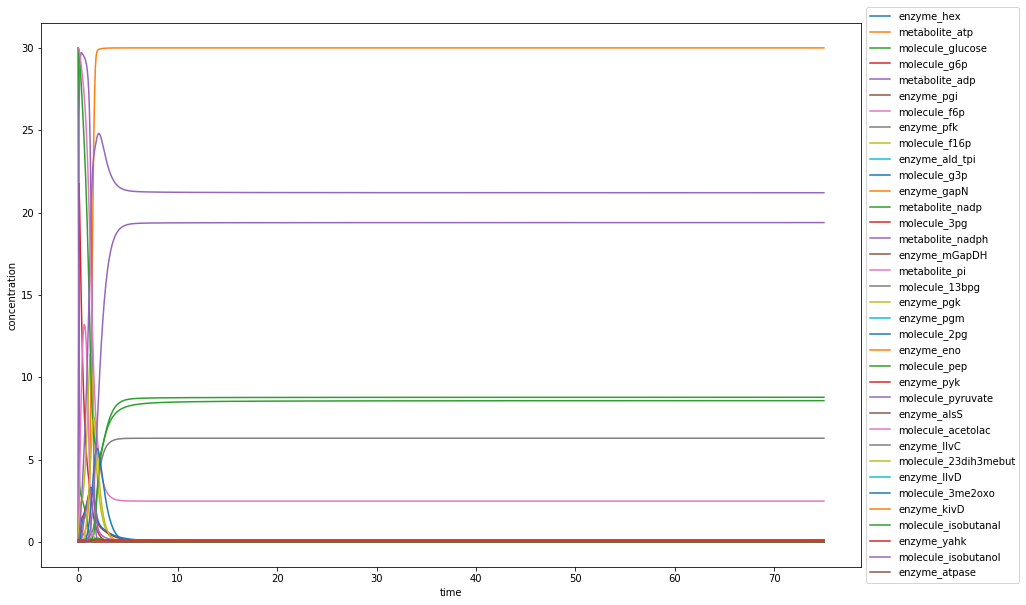

In [45]:
from numpy import *
from matplotlib.pylab import *
from matplotlib.pyplot import *
from scipy.integrate import odeint 

def simulateModel(t0, tend, numPoints):
  
  #compartments
  default = 1e-06

  
  #boundary species
  
  def ode_fun(x, t): # REMOVE 
    x0 = enzyme_hex = x[0]
    x1 = metabolite_atp = x[1]
    x2 = molecule_glucose = x[2]
    x3 = molecule_g6p = x[3]
    x4 = metabolite_adp = x[4]
    x7 = enzyme_pgi = x[5]
    x8 = molecule_f6p = x[6]
    x11 = enzyme_pfk = x[7]
    x12 = molecule_f16p = x[8]
    x15 = enzyme_ald_tpi = x[9]
    x16 = molecule_g3p = x[10]
    x19 = enzyme_gapN = x[11]
    x20 = metabolite_nadp = x[12]
    x21 = molecule_3pg = x[13]
    x22 = metabolite_nadph = x[14]
    x25 = enzyme_mGapDH = x[15]
    x26 = metabolite_pi = x[16]
    x27 = molecule_13bpg = x[17]
    x30 = enzyme_pgk = x[18]
    x33 = enzyme_pgm = x[19]
    x34 = molecule_2pg = x[20]
    x37 = enzyme_eno = x[21]
    x38 = molecule_pep = x[22]
    x41 = enzyme_pyk = x[23]
    x42 = molecule_pyruvate = x[24]
    x45 = enzyme_alsS = x[25]
    x46 = molecule_acetolac = x[26]
    x49 = enzyme_IlvC = x[27]
    x50 = molecule_23dih3mebut = x[28]
    x53 = enzyme_IlvD = x[29]
    x54 = molecule_3me2oxo = x[30]
    x57 = enzyme_kivD = x[31]
    x58 = molecule_isobutanal = x[32]
    x61 = enzyme_yahk = x[33]
    x62 = molecule_isobutanol = x[34]
    x65 = enzyme_atpase = x[35]


    return array([-14.9993750260406*x0*x1*x2 - 1.5*x0*x3*x4 + 2.0e-13*x0*(74996875130203.0*x1*x2 + 7500000000000.0*x3*x4),
 -14.9993750260406*x0*x1*x2 - 3.0*x1**2*x41*x42**2 - 14.9993750260406*x1*x11*x8 - 1.5*x1*x21**2*x30 - 8.57142857142857*x1*x65 + 2.0e-13*x30*(7500000000000.0*x1*x21**2 + 74996875130203.0*x27*x4) + 4.0e-13*x41*(7500000000000.0*x1**2*x42**2 + 74996875130203.0*x38**2*x4**2),
 -14.9993750260406*x0*x1*x2,
 -1.5*x0*x3*x4 + 2.0e-13*x0*(74996875130203.0*x1*x2 + 7500000000000.0*x3*x4) - 14.9993750260406*x3*x7,
 -1.5*x0*x3*x4 + 2.0e-13*x0*(74996875130203.0*x1*x2 + 7500000000000.0*x3*x4) - 1.5*x11*x12*x4 + 2.0e-13*x11*(74996875130203.0*x1*x8 + 7500000000000.0*x12*x4) - 1.5*x26*x4*x65 - 14.9993750260406*x27*x30*x4 - 29.9987500520812*x38**2*x4**2*x41 + 0.214285714285714*x65*(40.0*x1 + 7.0*x26*x4),
 -14.9993750260406*x3*x7 - 1.5*x7*x8 + 2.0e-13*x7*(74996875130203.0*x3 + 7500000000000.0*x8),
 -14.9993750260406*x1*x11*x8 - 1.5*x7*x8 + 2.0e-13*x7*(74996875130203.0*x3 + 7500000000000.0*x8),
 -14.9993750260406*x1*x11*x8 - 1.5*x11*x12*x4 + 2.0e-13*x11*(74996875130203.0*x1*x8 + 7500000000000.0*x12*x4),
 -1.5*x11*x12*x4 + 2.0e-13*x11*(74996875130203.0*x1*x8 + 7500000000000.0*x12*x4) - 14.9993750260406*x12*x15,
 -14.9993750260406*x12*x15 - 1.5*x15*x16**2 + 2.0e-13*x15*(74996875130203.0*x12 + 7500000000000.0*x16**2),
 -3.0*x15*x16**2 + 4.0e-13*x15*(74996875130203.0*x12 + 7500000000000.0*x16**2) - 29.9987500520812*x16**2*x19*x20**2 - 29.9987500520812*x16**2*x20**2*x25*x26,
 -14.9993750260406*x16**2*x19*x20**2 - 1.5*x19*x21**2*x22**2 + 2.0e-13*x19*(74996875130203.0*x16**2*x20**2 + 7500000000000.0*x21**2*x22**2),
 -29.9987500520812*x16**2*x19*x20**2 - 29.9987500520812*x16**2*x20**2*x25*x26 - 1.5*x20*x49*x50 - 1.5*x20*x61*x62 + 2.0e-13*x49*(7500000000000.0*x20*x50 + 74996875130203.0*x22*x46) + 2.0e-13*x61*(7500000000000.0*x20*x62 + 74996875130203.0*x22*x58),
 -3.0*x1*x21**2*x30 - 3.0*x19*x21**2*x22**2 + 4.0e-13*x19*(74996875130203.0*x16**2*x20**2 + 7500000000000.0*x21**2*x22**2) - 29.9987500520812*x21**2*x33 + 4.0e-13*x30*(7500000000000.0*x1*x21**2 + 74996875130203.0*x27*x4),
 -3.0*x19*x21**2*x22**2 + 4.0e-13*x19*(74996875130203.0*x16**2*x20**2 + 7500000000000.0*x21**2*x22**2) - 3.0*x22**2*x25*x27 - 14.9993750260406*x22*x46*x49 - 14.9993750260406*x22*x58*x61 + 4.0e-13*x25*(74996875130203.0*x16**2*x20**2*x26 + 7500000000000.0*x22**2*x27),
 -14.9993750260406*x16**2*x20**2*x25*x26 - 1.5*x22**2*x25*x27 + 2.0e-13*x25*(74996875130203.0*x16**2*x20**2*x26 + 7500000000000.0*x22**2*x27),
 -14.9993750260406*x16**2*x20**2*x25*x26 - 1.5*x26*x4*x65 + 0.214285714285714*x65*(40.0*x1 + 7.0*x26*x4),
 -1.5*x22**2*x25*x27 + 2.0e-13*x25*(74996875130203.0*x16**2*x20**2*x26 + 7500000000000.0*x22**2*x27) - 14.9993750260406*x27*x30*x4,
 -1.5*x1*x21**2*x30 - 14.9993750260406*x27*x30*x4 + 2.0e-13*x30*(7500000000000.0*x1*x21**2 + 74996875130203.0*x27*x4),
 -14.9993750260406*x21**2*x33 - 1.5*x33*x34**2 + 2.0e-13*x33*(74996875130203.0*x21**2 + 7500000000000.0*x34**2),
 -3.0*x33*x34**2 + 4.0e-13*x33*(74996875130203.0*x21**2 + 7500000000000.0*x34**2) - 29.9987500520812*x34**2*x37,
 -14.9993750260406*x34**2*x37 - 1.5*x37*x38**2 + 2.0e-13*x37*(74996875130203.0*x34**2 + 7500000000000.0*x38**2),
 -3.0*x37*x38**2 + 4.0e-13*x37*(74996875130203.0*x34**2 + 7500000000000.0*x38**2) - 29.9987500520812*x38**2*x4**2*x41,
 -1.5*x1**2*x41*x42**2 - 14.9993750260406*x38**2*x4**2*x41 + 2.0e-13*x41*(7500000000000.0*x1**2*x42**2 + 74996875130203.0*x38**2*x4**2),
 -3.0*x1**2*x41*x42**2 + 4.0e-13*x41*(7500000000000.0*x1**2*x42**2 + 74996875130203.0*x38**2*x4**2) - 29.9987500520812*x42**2*x45,
 -14.9993750260406*x42**2*x45 - 1.5*x45*x46 + 2.0e-13*x45*(74996875130203.0*x42**2 + 7500000000000.0*x46),
 -14.9993750260406*x22*x46*x49 - 1.5*x45*x46 + 2.0e-13*x45*(74996875130203.0*x42**2 + 7500000000000.0*x46),
 -1.5*x20*x49*x50 - 14.9993750260406*x22*x46*x49 + 2.0e-13*x49*(7500000000000.0*x20*x50 + 74996875130203.0*x22*x46),
 -1.5*x20*x49*x50 + 2.0e-13*x49*(7500000000000.0*x20*x50 + 74996875130203.0*x22*x46) - 14.9993750260406*x50*x53,
 -14.9993750260406*x50*x53 - 1.5*x53*x54 + 2.0e-13*x53*(74996875130203.0*x50 + 7500000000000.0*x54),
 -1.5*x53*x54 + 2.0e-13*x53*(74996875130203.0*x50 + 7500000000000.0*x54) - 14.9993750260406*x54*x57,
 -14.9993750260406*x54*x57 - 1.5*x57*x58 + 2.0e-13*x57*(74996875130203.0*x54 + 7500000000000.0*x58),
 -14.9993750260406*x22*x58*x61 - 1.5*x57*x58 + 2.0e-13*x57*(74996875130203.0*x54 + 7500000000000.0*x58),
 -1.5*x20*x61*x62 - 14.9993750260406*x22*x58*x61 + 2.0e-13*x61*(7500000000000.0*x20*x62 + 74996875130203.0*x22*x58),
 -1.5*x20*x61*x62 + 2.0e-13*x61*(7500000000000.0*x20*x62 + 74996875130203.0*x22*x58),
 -8.57142857142857*x1*x65 - 1.5*x26*x4*x65 + 0.214285714285714*x65*(40.0*x1 + 7.0*x26*x4)])

  time = linspace(t0, tend, numPoints)
  #yinit= array([0.15, 30.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.15, 30.0, 0.0, 0.0, 0.0, 0.0, 0.15, 30.0, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0])
  #yinit = x_init
  yinit = x_init
  y = odeint(ode_fun, yinit, time)

  return time, y


time, result = simulateModel(0, 75, 1000)

fig = figure(figsize = (21,10))
ax = subplot(111)
plot(time,result[:,0], label="enzyme_hex", lw=1.5)
plot(time,result[:,1], label="metabolite_atp", lw=1.5)
plot(time,result[:,2], label="molecule_glucose", lw=1.5)
plot(time,result[:,3], label="molecule_g6p", lw=1.5)
plot(time,result[:,4], label="metabolite_adp", lw=1.5)
plot(time,result[:,5], label="enzyme_pgi", lw=1.5)
plot(time,result[:,6], label="molecule_f6p", lw=1.5)
plot(time,result[:,7], label="enzyme_pfk", lw=1.5)
plot(time,result[:,8], label="molecule_f16p", lw=1.5)
plot(time,result[:,9], label="enzyme_ald_tpi", lw=1.5)
plot(time,result[:,10], label="molecule_g3p", lw=1.5)
plot(time,result[:,11], label="enzyme_gapN", lw=1.5)
plot(time,result[:,12], label="metabolite_nadp", lw=1.5)
plot(time,result[:,13], label="molecule_3pg", lw=1.5)
plot(time,result[:,14], label="metabolite_nadph", lw=1.5)
plot(time,result[:,15], label="enzyme_mGapDH", lw=1.5)
plot(time,result[:,16], label="metabolite_pi", lw=1.5)
plot(time,result[:,17], label="molecule_13bpg", lw=1.5)
plot(time,result[:,18], label="enzyme_pgk", lw=1.5)
plot(time,result[:,19], label="enzyme_pgm", lw=1.5)
plot(time,result[:,20], label="molecule_2pg", lw=1.5)
plot(time,result[:,21], label="enzyme_eno", lw=1.5)
plot(time,result[:,22], label="molecule_pep", lw=1.5)
plot(time,result[:,23], label="enzyme_pyk", lw=1.5)
plot(time,result[:,24], label="molecule_pyruvate", lw=1.5)
plot(time,result[:,25], label="enzyme_alsS", lw=1.5)
plot(time,result[:,26], label="molecule_acetolac", lw=1.5)
plot(time,result[:,27], label="enzyme_IlvC", lw=1.5)
plot(time,result[:,28], label="molecule_23dih3mebut", lw=1.5)
plot(time,result[:,29], label="enzyme_IlvD", lw=1.5)
plot(time,result[:,30], label="molecule_3me2oxo", lw=1.5)
plot(time,result[:,31], label="enzyme_kivD", lw=1.5)
plot(time,result[:,32], label="molecule_isobutanal", lw=1.5)
plot(time,result[:,33], label="enzyme_yahk", lw=1.5)
plot(time,result[:,34], label="molecule_isobutanol", lw=1.5)
plot(time,result[:,35], label="enzyme_atpase", lw=1.5)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
xlabel("time")
ylabel("concentration")
legend(loc="center left", bbox_to_anchor=(1, 0.5))
show()




In [67]:
aa.f

[-14.9993750260406*x0*x1*x2 - 1.5*x0*x3*x4 + 2.0e-13*x0*(74996875130203.0*x1*x2 + 7500000000000.0*x3*x4),
 -14.9993750260406*x0*x1*x2 - 3.0*x1**2*x41*x42**2 - 14.9993750260406*x1*x11*x8 - 1.5*x1*x21**2*x30 - 8.57142857142857*x1*x65 + 2.0e-13*x30*(7500000000000.0*x1*x21**2 + 74996875130203.0*x27*x4) + 4.0e-13*x41*(7500000000000.0*x1**2*x42**2 + 74996875130203.0*x38**2*x4**2),
 -14.9993750260406*x0*x1*x2,
 -1.5*x0*x3*x4 + 2.0e-13*x0*(74996875130203.0*x1*x2 + 7500000000000.0*x3*x4) - 14.9993750260406*x3*x7,
 -1.5*x0*x3*x4 + 2.0e-13*x0*(74996875130203.0*x1*x2 + 7500000000000.0*x3*x4) - 1.5*x11*x12*x4 + 2.0e-13*x11*(74996875130203.0*x1*x8 + 7500000000000.0*x12*x4) - 1.5*x26*x4*x65 - 14.9993750260406*x27*x30*x4 - 29.9987500520812*x38**2*x4**2*x41 + 0.214285714285714*x65*(40.0*x1 + 7.0*x26*x4),
 -14.9993750260406*x3*x7 - 1.5*x7*x8 + 2.0e-13*x7*(74996875130203.0*x3 + 7500000000000.0*x8),
 -14.9993750260406*x1*x11*x8 - 1.5*x7*x8 + 2.0e-13*x7*(74996875130203.0*x3 + 7500000000000.0*x8),
 -14.9993

try to put it all together, big for loop

**Not sure if this works best, aa.f isn't being recognized so plotting same thing over and over:(**

attempting to retain : [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65]
Successful time-scale separation solution obtained.


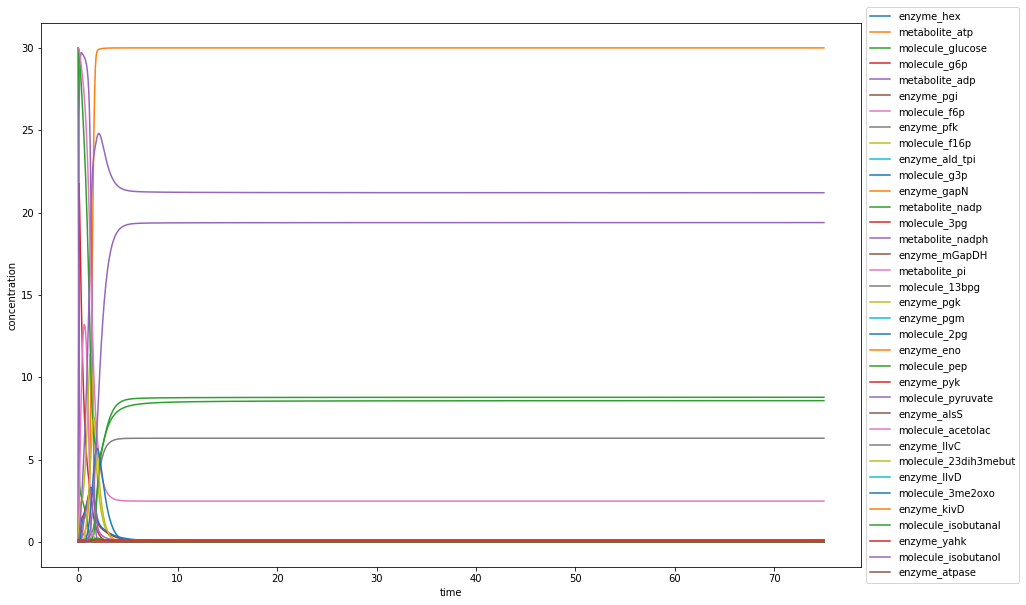

In [86]:



j = 0
for j in range(1):
    
    %run prep_for_autoreduce

    i_list = [5,6,9,10,13, 14,17,18,23,24,28,29,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,66,67]
    spec_inds = [0, 1, 2, 3, 4, 7, 8, 11, 12, 15, 16, 19, 20, 21, 22, 25, 26, 27, 30, 33, 34, 37, 38, 41, 42, 45, 46, 49, 50, 53, 54, 57, 58, 61, 62, 65] # indices of stuff we decided to keep

    x_init = np.zeros(len(spec_inds))

    for i,ind in enumerate(spec_inds):

        if ind in enz_list:
            x_init[i] = 0.15
        elif ind in mol_list:
            x_init[i] = 30
        else:
            x_init[i] = 0

            
            
    timescale_list = []
    for i in i_list:
        timescale_list.append(x[i])


    # Get appropriate list of complexes that are not in timescale_list
    # What you should pass into solve_timescale_separation
    update_timescale = []
    for item in x:
        if item not in timescale_list:
            update_timescale.append(item)


    timepoints_ssm = np.linspace(0,100,10)
    timepoints_ode = np.linspace(0, 100, 10)
    sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)

    aa,bb = sys_reduce.solve_timescale_separation(update_timescale)
    
    
    from numpy import *
    from matplotlib.pylab import *
    from matplotlib.pyplot import *
    from scipy.integrate import odeint 

    def simulateModel(t0, tend, numPoints):

      #compartments
      default = 1e-06


      #boundary species

      def ode_fun(x, t): # REMOVE 
        x0 = enzyme_hex = x[0]
        x1 = metabolite_atp = x[1]
        x2 = molecule_glucose = x[2]
        x3 = molecule_g6p = x[3]
        x4 = metabolite_adp = x[4]
        x7 = enzyme_pgi = x[5]
        x8 = molecule_f6p = x[6]
        x11 = enzyme_pfk = x[7]
        x12 = molecule_f16p = x[8]
        x15 = enzyme_ald_tpi = x[9]
        x16 = molecule_g3p = x[10]
        x19 = enzyme_gapN = x[11]
        x20 = metabolite_nadp = x[12]
        x21 = molecule_3pg = x[13]
        x22 = metabolite_nadph = x[14]
        x25 = enzyme_mGapDH = x[15]
        x26 = metabolite_pi = x[16]
        x27 = molecule_13bpg = x[17]
        x30 = enzyme_pgk = x[18]
        x33 = enzyme_pgm = x[19]
        x34 = molecule_2pg = x[20]
        x37 = enzyme_eno = x[21]
        x38 = molecule_pep = x[22]
        x41 = enzyme_pyk = x[23]
        x42 = molecule_pyruvate = x[24]
        x45 = enzyme_alsS = x[25]
        x46 = molecule_acetolac = x[26]
        x49 = enzyme_IlvC = x[27]
        x50 = molecule_23dih3mebut = x[28]
        x53 = enzyme_IlvD = x[29]
        x54 = molecule_3me2oxo = x[30]
        x57 = enzyme_kivD = x[31]
        x58 = molecule_isobutanal = x[32]
        x61 = enzyme_yahk = x[33]
        x62 = molecule_isobutanol = x[34]
        x65 = enzyme_atpase = x[35]



        return np.array([-14.9993750260406*x0*x1*x2 - 1.5*x0*x3*x4 + 2.0e-13*x0*(74996875130203.0*x1*x2 + 7500000000000.0*x3*x4),
 -14.9993750260406*x0*x1*x2 - 3.0*x1**2*x41*x42**2 - 14.9993750260406*x1*x11*x8 - 1.5*x1*x21**2*x30 - 8.57142857142857*x1*x65 + 2.0e-13*x30*(7500000000000.0*x1*x21**2 + 74996875130203.0*x27*x4) + 4.0e-13*x41*(7500000000000.0*x1**2*x42**2 + 74996875130203.0*x38**2*x4**2),
 -14.9993750260406*x0*x1*x2,
 -1.5*x0*x3*x4 + 2.0e-13*x0*(74996875130203.0*x1*x2 + 7500000000000.0*x3*x4) - 14.9993750260406*x3*x7,
 -1.5*x0*x3*x4 + 2.0e-13*x0*(74996875130203.0*x1*x2 + 7500000000000.0*x3*x4) - 1.5*x11*x12*x4 + 2.0e-13*x11*(74996875130203.0*x1*x8 + 7500000000000.0*x12*x4) - 1.5*x26*x4*x65 - 14.9993750260406*x27*x30*x4 - 29.9987500520812*x38**2*x4**2*x41 + 0.214285714285714*x65*(40.0*x1 + 7.0*x26*x4),
 -14.9993750260406*x3*x7 - 1.5*x7*x8 + 2.0e-13*x7*(74996875130203.0*x3 + 7500000000000.0*x8),
 -14.9993750260406*x1*x11*x8 - 1.5*x7*x8 + 2.0e-13*x7*(74996875130203.0*x3 + 7500000000000.0*x8),
 -14.9993750260406*x1*x11*x8 - 1.5*x11*x12*x4 + 2.0e-13*x11*(74996875130203.0*x1*x8 + 7500000000000.0*x12*x4),
 -1.5*x11*x12*x4 + 2.0e-13*x11*(74996875130203.0*x1*x8 + 7500000000000.0*x12*x4) - 14.9993750260406*x12*x15,
 -14.9993750260406*x12*x15 - 1.5*x15*x16**2 + 2.0e-13*x15*(74996875130203.0*x12 + 7500000000000.0*x16**2),
 -3.0*x15*x16**2 + 4.0e-13*x15*(74996875130203.0*x12 + 7500000000000.0*x16**2) - 29.9987500520812*x16**2*x19*x20**2 - 29.9987500520812*x16**2*x20**2*x25*x26,
 -14.9993750260406*x16**2*x19*x20**2 - 1.5*x19*x21**2*x22**2 + 2.0e-13*x19*(74996875130203.0*x16**2*x20**2 + 7500000000000.0*x21**2*x22**2),
 -29.9987500520812*x16**2*x19*x20**2 - 29.9987500520812*x16**2*x20**2*x25*x26 - 1.5*x20*x49*x50 - 1.5*x20*x61*x62 + 2.0e-13*x49*(7500000000000.0*x20*x50 + 74996875130203.0*x22*x46) + 2.0e-13*x61*(7500000000000.0*x20*x62 + 74996875130203.0*x22*x58),
 -3.0*x1*x21**2*x30 - 3.0*x19*x21**2*x22**2 + 4.0e-13*x19*(74996875130203.0*x16**2*x20**2 + 7500000000000.0*x21**2*x22**2) - 29.9987500520812*x21**2*x33 + 4.0e-13*x30*(7500000000000.0*x1*x21**2 + 74996875130203.0*x27*x4),
 -3.0*x19*x21**2*x22**2 + 4.0e-13*x19*(74996875130203.0*x16**2*x20**2 + 7500000000000.0*x21**2*x22**2) - 3.0*x22**2*x25*x27 - 14.9993750260406*x22*x46*x49 - 14.9993750260406*x22*x58*x61 + 4.0e-13*x25*(74996875130203.0*x16**2*x20**2*x26 + 7500000000000.0*x22**2*x27),
 -14.9993750260406*x16**2*x20**2*x25*x26 - 1.5*x22**2*x25*x27 + 2.0e-13*x25*(74996875130203.0*x16**2*x20**2*x26 + 7500000000000.0*x22**2*x27),
 -14.9993750260406*x16**2*x20**2*x25*x26 - 1.5*x26*x4*x65 + 0.214285714285714*x65*(40.0*x1 + 7.0*x26*x4),
 -1.5*x22**2*x25*x27 + 2.0e-13*x25*(74996875130203.0*x16**2*x20**2*x26 + 7500000000000.0*x22**2*x27) - 14.9993750260406*x27*x30*x4,
 -1.5*x1*x21**2*x30 - 14.9993750260406*x27*x30*x4 + 2.0e-13*x30*(7500000000000.0*x1*x21**2 + 74996875130203.0*x27*x4),
 -14.9993750260406*x21**2*x33 - 1.5*x33*x34**2 + 2.0e-13*x33*(74996875130203.0*x21**2 + 7500000000000.0*x34**2),
 -3.0*x33*x34**2 + 4.0e-13*x33*(74996875130203.0*x21**2 + 7500000000000.0*x34**2) - 29.9987500520812*x34**2*x37,
 -14.9993750260406*x34**2*x37 - 1.5*x37*x38**2 + 2.0e-13*x37*(74996875130203.0*x34**2 + 7500000000000.0*x38**2),
 -3.0*x37*x38**2 + 4.0e-13*x37*(74996875130203.0*x34**2 + 7500000000000.0*x38**2) - 29.9987500520812*x38**2*x4**2*x41,
 -1.5*x1**2*x41*x42**2 - 14.9993750260406*x38**2*x4**2*x41 + 2.0e-13*x41*(7500000000000.0*x1**2*x42**2 + 74996875130203.0*x38**2*x4**2),
 -3.0*x1**2*x41*x42**2 + 4.0e-13*x41*(7500000000000.0*x1**2*x42**2 + 74996875130203.0*x38**2*x4**2) - 29.9987500520812*x42**2*x45,
 -14.9993750260406*x42**2*x45 - 1.5*x45*x46 + 2.0e-13*x45*(74996875130203.0*x42**2 + 7500000000000.0*x46),
 -14.9993750260406*x22*x46*x49 - 1.5*x45*x46 + 2.0e-13*x45*(74996875130203.0*x42**2 + 7500000000000.0*x46),
 -1.5*x20*x49*x50 - 14.9993750260406*x22*x46*x49 + 2.0e-13*x49*(7500000000000.0*x20*x50 + 74996875130203.0*x22*x46),
 -1.5*x20*x49*x50 + 2.0e-13*x49*(7500000000000.0*x20*x50 + 74996875130203.0*x22*x46) - 14.9993750260406*x50*x53,
 -14.9993750260406*x50*x53 - 1.5*x53*x54 + 2.0e-13*x53*(74996875130203.0*x50 + 7500000000000.0*x54),
 -1.5*x53*x54 + 2.0e-13*x53*(74996875130203.0*x50 + 7500000000000.0*x54) - 14.9993750260406*x54*x57,
 -14.9993750260406*x54*x57 - 1.5*x57*x58 + 2.0e-13*x57*(74996875130203.0*x54 + 7500000000000.0*x58),
 -14.9993750260406*x22*x58*x61 - 1.5*x57*x58 + 2.0e-13*x57*(74996875130203.0*x54 + 7500000000000.0*x58),
 -1.5*x20*x61*x62 - 14.9993750260406*x22*x58*x61 + 2.0e-13*x61*(7500000000000.0*x20*x62 + 74996875130203.0*x22*x58),
 -1.5*x20*x61*x62 + 2.0e-13*x61*(7500000000000.0*x20*x62 + 74996875130203.0*x22*x58),
 -8.57142857142857*x1*x65 - 1.5*x26*x4*x65 + 0.214285714285714*x65*(40.0*x1 + 7.0*x26*x4)])
    
      

      time = linspace(t0, tend, numPoints)
      
      yinit = x_init
      y = odeint(ode_fun, yinit, time)

      return time, y


    time, result = simulateModel(0, 75, 1000)

    fig = figure(figsize = (21,10))
    ax = subplot(111)
    plot(time,result[:,0], label="enzyme_hex", lw=1.5)
    plot(time,result[:,1], label="metabolite_atp", lw=1.5)
    plot(time,result[:,2], label="molecule_glucose", lw=1.5)
    plot(time,result[:,3], label="molecule_g6p", lw=1.5)
    plot(time,result[:,4], label="metabolite_adp", lw=1.5)
    plot(time,result[:,5], label="enzyme_pgi", lw=1.5)
    plot(time,result[:,6], label="molecule_f6p", lw=1.5)
    plot(time,result[:,7], label="enzyme_pfk", lw=1.5)
    plot(time,result[:,8], label="molecule_f16p", lw=1.5)
    plot(time,result[:,9], label="enzyme_ald_tpi", lw=1.5)
    plot(time,result[:,10], label="molecule_g3p", lw=1.5)
    plot(time,result[:,11], label="enzyme_gapN", lw=1.5)
    plot(time,result[:,12], label="metabolite_nadp", lw=1.5)
    plot(time,result[:,13], label="molecule_3pg", lw=1.5)
    plot(time,result[:,14], label="metabolite_nadph", lw=1.5)
    plot(time,result[:,15], label="enzyme_mGapDH", lw=1.5)
    plot(time,result[:,16], label="metabolite_pi", lw=1.5)
    plot(time,result[:,17], label="molecule_13bpg", lw=1.5)
    plot(time,result[:,18], label="enzyme_pgk", lw=1.5)
    plot(time,result[:,19], label="enzyme_pgm", lw=1.5)
    plot(time,result[:,20], label="molecule_2pg", lw=1.5)
    plot(time,result[:,21], label="enzyme_eno", lw=1.5)
    plot(time,result[:,22], label="molecule_pep", lw=1.5)
    plot(time,result[:,23], label="enzyme_pyk", lw=1.5)
    plot(time,result[:,24], label="molecule_pyruvate", lw=1.5)
    plot(time,result[:,25], label="enzyme_alsS", lw=1.5)
    plot(time,result[:,26], label="molecule_acetolac", lw=1.5)
    plot(time,result[:,27], label="enzyme_IlvC", lw=1.5)
    plot(time,result[:,28], label="molecule_23dih3mebut", lw=1.5)
    plot(time,result[:,29], label="enzyme_IlvD", lw=1.5)
    plot(time,result[:,30], label="molecule_3me2oxo", lw=1.5)
    plot(time,result[:,31], label="enzyme_kivD", lw=1.5)
    plot(time,result[:,32], label="molecule_isobutanal", lw=1.5)
    plot(time,result[:,33], label="enzyme_yahk", lw=1.5)
    plot(time,result[:,34], label="molecule_isobutanol", lw=1.5)
    plot(time,result[:,35], label="enzyme_atpase", lw=1.5)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
    xlabel("time")
    ylabel("concentration")
    legend(loc="center left", bbox_to_anchor=(1, 0.5))
    show()





Okay if we compare this to original it's too far. I guess error metric of ~2.8 is too high for me. This may change with parameters however, so you might either want to run reduce_simple or pick one and run w it.

## Definitely need to automate autoreduce, will make entire process a lot easier

In [91]:
#watermark
%reload_ext watermark
%watermark -v -p numpy,bokeh,jupyterlab,matplotlib,auto_reduce,scipy,libsbml,sys,math,tqdm
  

CPython 3.7.7
IPython 7.13.0

numpy 1.18.1
bokeh 2.0.2
jupyterlab 1.2.6
matplotlib 3.1.3
auto_reduce 0.1
scipy 1.4.1
libsbml 5.18.0
sys 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
math unknown
tqdm 4.46.0
